# Question 3 – Statistics - Regression Analysis (35 marks)

In this question you will perform a linear regression. You are given a dataset (housing.csv) which includes information concerning housing in the area of Boston Mass. We will investigate whether the value of a house can be predicted from the information provided. The column names and a short description is provided below:

```
Columns description:
- CRIM - per capita crime rate by town
- INDUS - proportion of non-retail business acres per town
- NOX - nitric oxides concentration (parts per 10 million)
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RM - average number of rooms per dwelling
- TAX - full-value property-tax rate per 10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in 1000's
```

## Q3.a - Linear regression: Measure predictors(10 marks)
Implement a function `measure_predictors(filepath)` where `filepath` is the the path to `housing.csv`. The functions should fit the model using all available features `CRIM, INDUS, NOX, AGE, DIS, RM, TAX, PTRATIO, B, LSTAT` as predictors and the value of the house, `MEDV`, as the target. After fitting the model, print the summary of the model and the predictors that can be assumed to be insignificant based on their pvalue (given $\alpha = 0.05$).

In [3]:
# suggested imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy
from urllib import request
import scipy.stats as stats
from statsmodels import graphics
import arviz as az
import pymc3 as pm
from pymc3 import glm
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, RocCurveDisplay, auc, roc_curve
import seaborn as sns
sns.set_style(style="darkgrid", rc={"axes.facecolor": ".9", "grid.color": ".8"})
sns.set_palette(palette="deep")
sns_c = sns.color_palette(palette="deep")

import warnings
warnings.filterwarnings("ignore")

from pathlib import Path

In [4]:
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split


def measure_predictors(filepath):
    data = pd.read_csv(filepath/"housing.csv")
    data.head()
    data.info()
    data.describe()
    data.isnull().sum()
    data.dropna(inplace=True)
    

    # Traget variable
    y = data['MEDV']

    # Predictor variables
    X = data.drop(['MEDV'], axis=1)

    # Split data into train and test

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model = sm.OLS(y_train, X_train)
    results = model.fit()
    

    # Predict on the test data
    y_pred = results.predict(X_test)
    
    # Print Model summary
    print("Model Summary:")
    print(results.summary())
    print(results.summary().tables[1])
    
    


    
    # Evaluate the model
    print('R-squared:', results.rsquared)
    print('Adjusted R-squared:', results.rsquared_adj)
    print('Mean absolute error:', np.mean(np.abs(y_pred - y_test)))
    print('Mean squared error:', np.mean((y_pred - y_test)**2))
    print('Root mean squared error:', np.sqrt(np.mean((y_pred - y_test)**2)))
    print('Mean absolute percentage error:', np.mean(np.abs((y_pred - y_test)/y_test))*100)
    print('Mean percentage error:', np.mean((y_pred - y_test)/y_test)*100)
    print('\n')
    
    # Print the insignificant predictors
    print('Insignificant predictors:')
    print(results.pvalues>0.05)
    print('\n')
    

    

    return None
    


In [5]:
root = Path('/Users/joydipb/Documents/Cardiff Uni/CMT309/CMT309_Comp_DS')
measure_predictors(root)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TAX      394 non-null    int64  
 1   CRIM     394 non-null    float64
 2   INDUS    394 non-null    float64
 3   AGE      394 non-null    float64
 4   PTRATIO  394 non-null    float64
 5   LSTAT    394 non-null    float64
 6   DIS      394 non-null    float64
 7   RM       394 non-null    float64
 8   NOX      394 non-null    float64
 9   B        394 non-null    float64
 10  MEDV     394 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 34.0 KB
Model Summary:
                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                  

## Q3.b - Linear regression: Interaction analysis (8 marks)

Implement a function `interaction_model(filename, var1, var2)` where `filepath` is the the path to `housing.csv` and `var1` and `var2` are the variables which their interaction term is included. The functions should fit the model using all available features `CRIM, INDUS, NOX, AGE, DIS, RM, TAX, PTRATIO, B, LSTA` plus the interaction term of `var1` and `var2` as predictors, and the value of the house, `MEDV`, as the target. After fitting the model, print the summary of the model. 

How the model's performance change when the interaction of `LSTAT` and `CRIM` is added when compared to the model of Q3.a (based on adjusted R-squared)?

In [19]:
def interaction_model(filename, var1, var2):
    data = pd.read_csv(root/filename)

    # Traget variable
    y = data['MEDV']

    # Predictor variables
    X = data.drop(['MEDV'], axis=1)

    # Split data into train and test
    y_train, y_test = train_test_split(y, test_size=0.2, random_state=42)
    X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

    # add the interaction term
    X_train['interaction'] = X_train[var1] * X_train[var2]
    X_test['interaction'] = X_test[var1] * X_test[var2]



    # Train the model with all features and interaction term
    
    model = sm.OLS(y_train, X_train)
    results = model.fit()

    # Predict on the test data  with all features and interaction
    
    y_pred = results.predict(X_test)

    # Print Model summary
    print("Model Summary:")
    print(results.summary())
    print(results.summary().tables[1])

    # Evaluate the model
    print('R-squared:', results.rsquared)
    print('Adjusted R-squared:', results.rsquared_adj)
    print('Mean absolute error:', np.mean(np.abs(y_pred - y_test)))
    print('Mean squared error:', np.mean((y_pred - y_test)**2))
    print('Root mean squared error:', np.sqrt(np.mean((y_pred - y_test)**2)))
    print('Mean absolute percentage error:', np.mean(np.abs((y_pred - y_test)/y_test))*100)
    print('Mean percentage error:', np.mean((y_pred - y_test)/y_test)*100)
    print('\n')

    # Print the insignificant predictors
    print('Insignificant predictors:')
    print(results.pvalues>0.05)
    print('\n')

In [20]:
interaction_model("housing.csv", "LSTAT", "CRIM")

Model Summary:
                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              786.9
Date:                Sun, 31 Jul 2022   Prob (F-statistic):                   5.22e-216
Time:                        15:59:48   Log-Likelihood:                         -912.45
No. Observations:                 315   AIC:                                      1847.
Df Residuals:                     304   BIC:                                      1888.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

## Q3.c - Polynomial regression: Best model & house predictor(12 marks)

Often the dataset provided is not linearly separable and a simple linear regression model may not be able to derive relationships between both the independent and dependent variables. In such cases, a possible solution would be to implement polynomial regression instead. Polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x.

Example: Given y the depedent variable, x<sub>1</sub>, x<sub>2</sub> the independent variables, b<sub>0</sub> the bias and b<sub>1</sub>,b<sub>2</sub>,...,b<sub>n</sub> the weights a polynomial regression of degree 2 would have the form:

y = b<sub>0</sub> + b<sub>1</sub>x<sub>1</sub>  + b<sub>2</sub>x<sub>1</sub><sup>2</sup> + b<sub>3</sub>x<sub>2</sub>  + b<sub>4</sub>x<sub>2</sub><sup>2</sup>

Implement a function `polynomial_model(df, indepedent_var, dependent_var, degrees)` which given a dataframe `df`, a list of columns indicating the independent variables `indepedent_var`, a string indicating the dependent variable name `dependent_var`, and a list of integers indicating the degrees to test `degrees`, will return the best fitted regression model, best Adj. R-squared score and best degree.

Then, use the housing dataset, drop any features that were deemed non-significant in Q3.a, and find the degree that yields the best polynomial model (according to the adjusted R-squared metric) to predict the value of a house.



In [42]:
from sklearn.preprocessing import PolynomialFeatures


def polynomial_model(df, indepedent_var, dependent_var, degrees):
    
    # Initialize the best model
    best_model = None
    best_model_score = 0

    # Initialize the best degree
    best_degree = 0

    # Loop through all the degrees
    for degree in degrees:
        # Create the polynomial features
        poly_features = PolynomialFeatures(degree=degree)
        X_poly = poly_features.fit_transform(df[indepedent_var])
        X_poly = pd.DataFrame(X_poly)

        # Add the dependent variable
        X_poly[dependent_var] = df[dependent_var]

        # Split data into train and test
        X_train, X_test, y_train, y_test = train_test_split(X_poly, df[dependent_var], test_size=0.2, random_state=42)

        # Train the model
        model = sm.OLS(y_train, X_train)
        results = model.fit()

        # Predict on the test data
        y_pred = results.predict(X_test)

        # Evaluate the model using adjusted R-squared
        score = results.rsquared_adj
        

        # Update the best model if the score is better
        if score > best_model_score:
            best_model = results
            best_model_score = score
            best_degree = degree

    # Print the best model
    print("Best model:")
    print(best_model.summary())
    print(best_model.summary().tables[1])

    # Print the best degree
    print("Best degree:")
    print(best_degree)
    print('\n')

    # Print the best model score
    print("Best model score:")
    print(best_model_score)
    print('\n')

    return best_model, best_model_score, best_degree

In [43]:
# Example
df = pd.read_csv(root/"housing.csv")
indepedent_var = ['CRIM','PTRATIO', 'LSTAT', 'DIS' , 'RM','B'] # remember to exclude potential non-significant predictors
dependent_var = 'MEDV'
degrees = [1,2,3,4,5,6,7,8,9,10]

fitted_model, adj_rsquare, degree = polynomial_model(df, indepedent_var, dependent_var, degrees)

Best model:
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.138e+31
Date:                Sun, 31 Jul 2022   Prob (F-statistic):               0.00
Time:                        20:10:48   Log-Likelihood:                 9525.3
No. Observations:                 315   AIC:                        -1.903e+04
Df Residuals:                     307   BIC:                        -1.900e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0          -4.174e-14   2.05e-14     -2.

## Q3.d - Residual analysis: Plot (5 marks)

Metrics such as adjusted R-square and R-square provide useful insights but they do not necessary indicate an appropriate model. Residual analysis is used to assess the appropriateness of a linear regression model by defining residuals and examining the residual plot graphs. Perform a residual analysis on the best model acquired from Question Q3.c) by plotting and interpreting the residuals vs fitted values plot. Implement a function `plot_residuals(model)` where `model` is a fitted model (in your case the one returned from `polynomial_model(df, indepedent_var, dependent_var, degrees)` function in Q3.c) that plots the residuals vs the fitted values. 

In [74]:
def plot_residuals(model):
    residuals = model.resid
    plt.scatter(model.fittedvalues, residuals)
    # Fitted value vs residuals
    plt.title('Fitted values vs residuals')

    # Plot the regression line
    plt.plot(model.fittedvalues, np.zeros(len(model.fittedvalues)), 'r')
    
    plt.xlabel('Fitted values')
    plt.ylabel('Residuals')
    plt.show()


    pass

In [78]:
def plot_residuals_2(model):
#define figure size
    fig = plt.figure(figsize=(12,8))

#produce regression plots
    fig = sm.graphics.plot_regress_exog(model, 'MEDV', fig=fig)

    pass



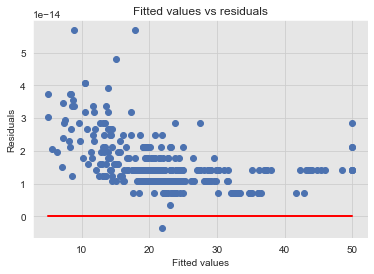

In [75]:
plot_residuals(fitted_model)

eval_env: 1


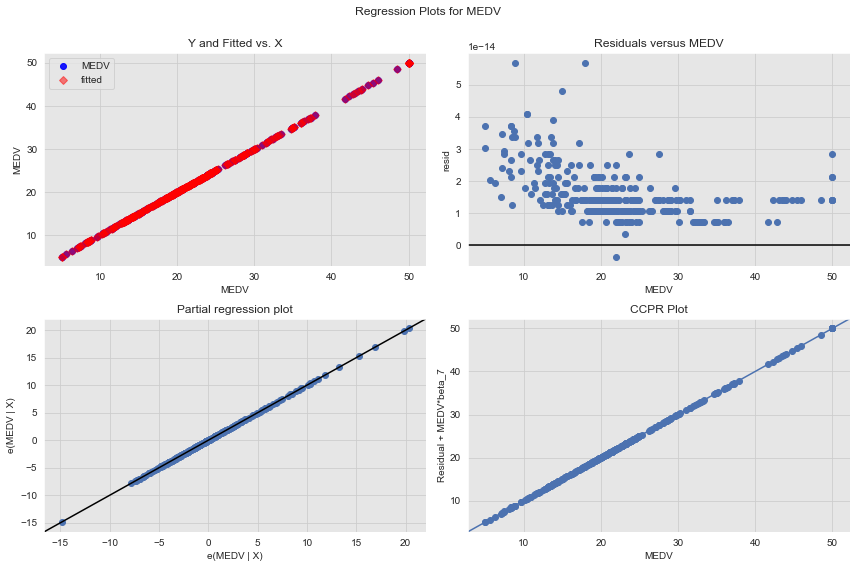

In [79]:
# Residual vs fitted values plot is the top right corner of the plot.
# residual vs. fitted plot by using the plot_regress_exog() function from the statsmodels library
plot_residuals_2(fitted_model)
# 